Para hacer apply a un daskdataframe es necesario pasarle meta que es el tipo de datos que va a tener. https://stackoverflow.com/a/44437675

In [3]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import locale
import re
locale.setlocale(locale.LC_TIME, "es_ES") 

'es_ES'

In [5]:
oferta = pd.read_pickle('./datos/output/pickles/oferta_diaria_media.pickle')

In [10]:
oferta.head(5)

,CLinea,Elinea,Denominacion,FServicio,IDFranja,Intervalo,Coches,Diario,fechaCorta,MediaCochesMes,MediaCochesMes_Laborables,MediaCochesMes_HoraPunta
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019-01-01,H07,070000 - 075959,2.0,True,enero.2019,5.580645,5.580645,6.516129
1,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019-01-01,H08,080000 - 085959,3.0,True,enero.2019,6.580645,6.580645,6.516129
2,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019-01-01,H09,090000 - 095959,3.0,True,enero.2019,7.387097,7.387097,6.516129
3,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019-01-01,H10,100000 - 105959,4.0,True,enero.2019,8.903226,8.903226,NaN
4,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019-01-01,H11,110000 - 115959,4.0,True,enero.2019,9.193548,9.193548,NaN


In [49]:
tmp  = oferta[(oferta['CLinea']==19)&(oferta['IDFranja']=='H07')].reset_index(drop=True)

In [61]:
#Función para gráficar con matplotlib la línea en la fronja que corresponda

def graficar(dataset: pd.DataFrame,num_linea:int,franja:str,valores:str='MediaCochesMes',guardar:bool=False):
    fig, axes = plt.subplots(figsize=(12, 5),dpi=100)
    axes.spines.right.set_visible(False)
    axes.spines.top.set_visible(False)

    # num_linea = 21
    # franja = 'H10'

    # Filtro por linea y franja
    listado_franjas = dataset.loc[dataset['CLinea']==num_linea,'IDFranja'].unique()

    dataset = dataset[(dataset['CLinea']==num_linea)&(dataset['IDFranja']==franja)]
    dataset = dataset.dropna(subset=[valores]).drop_duplicates(subset=['fechaCorta']).reset_index(drop=True)
    
    if len(dataset)==0:
        raise Exception(f"Las franjas horarias de la linea {num_linea} son: {listado_franjas}") 
        
    lineaPublico = str(dataset.loc[0,"Elinea"])
    cartel_linea = str(dataset.loc[0,"Denominacion"])

    # Visualizo los datos (media) y fechas
    for fecha in dataset['FServicio'].dt.year.unique():
        axes.plot(dataset.loc[dataset['FServicio'].dt.year == fecha,'fechaCorta'],dataset.loc[dataset['FServicio'].dt.year == fecha, valores],'-o',label='Franja: '+ franja +'\nAño: '+str(fecha))


    # Configuraciones visuales
    axes.set_xticks(dataset['fechaCorta'])
    axes.set_xticklabels(dataset['fechaCorta'], rotation = 45, ha="right")
    
    # axes.set_yticks(range(0,int(dataset[valores].max()+3)))
    axes.set_ylim([0,dataset[valores].max()+3])

    xTicks = axes.get_xticklabels()
    indices_enero = [i for i, fecha in enumerate(dataset['FServicio']) if fecha.month==1]
            

    for indiceEnero in indices_enero:
        xTicks[indiceEnero].set_weight('bold')
    
    # Título y nombre ejes
    axes.set_xlabel('Fecha')
    axes.set_ylabel('# Autobuses')
    axes.set_title(label=f'Evolución núm. autobuses ({valores})\nLÍNEA {lineaPublico}: {cartel_linea}',pad=20)

    axes.grid(linestyle='--', linewidth=1, axis='both')

    leg = axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)

    # FALTA POR HACER ESTO-> Poner una caja debajo de las leyedenas que muestren datos como máx y min
    # p = leg.get_window_extent()
    # print(p)
    # axes.annotate('Annotation Text', (p.p0[0], p.p1[1]+10), (p.p0[0], p.p1[1]), 
    #             xycoords='figure pixels', zorder=9)


    # plt.legend(loc="lower right") # Esto puede deshabilitar quitando la línea
    if guardar:
        plt.savefig(fname=f'images/LÍNEA_{num_linea}_{franja}_{cartel_linea}.jpg',format='jpg', bbox_inches='tight', dpi=200)


    fig.set_facecolor('white')

    plt.show()

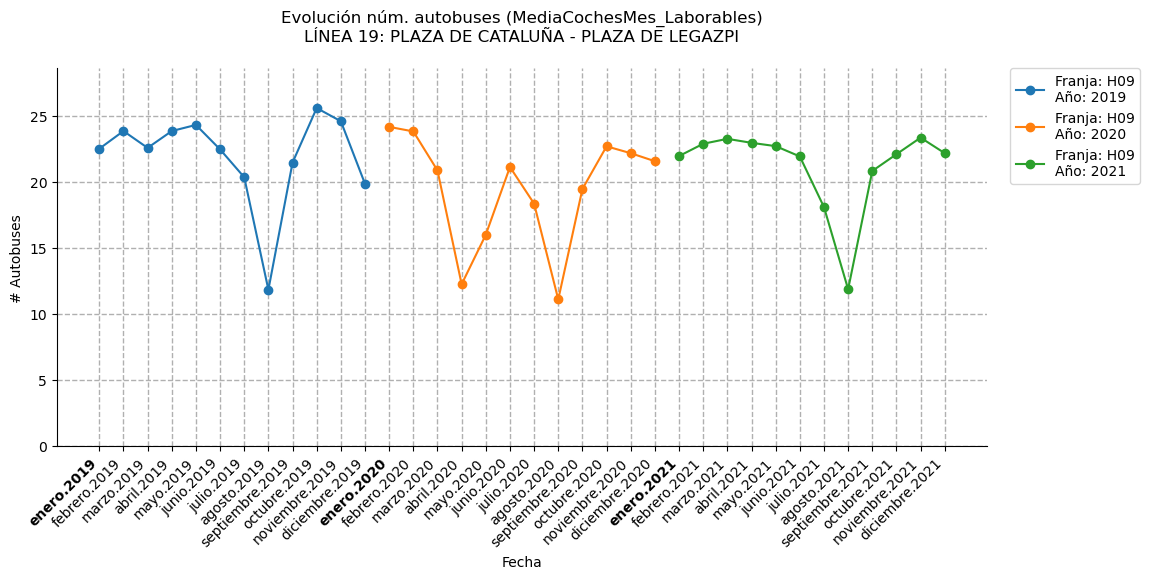

In [62]:
graficar(dataset=oferta,num_linea=19,franja='H09',valores='MediaCochesMes_Laborables')

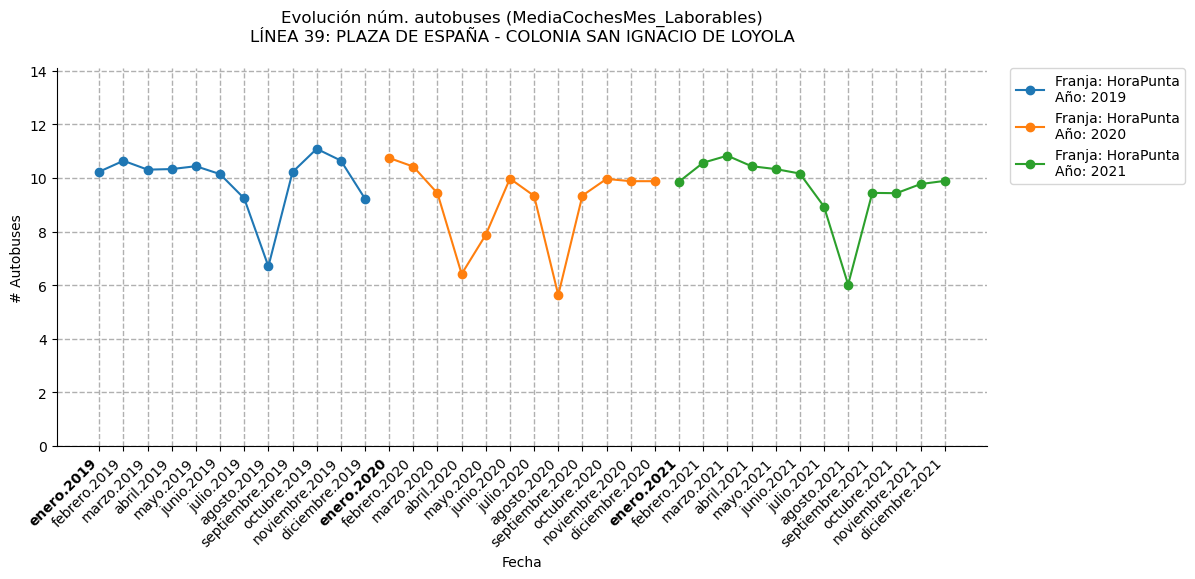

In [63]:
# [MediaCochesMes, MediaCochesLaborables]

graficar(dataset=oferta,num_linea=39,franja='HoraPunta',valores='MediaCochesMes_Laborables')

# Líneas con mayor afluencia de pasajeros
Según este tweet de [@EMTmadrid](https://twitter.com/emtmadrid/status/956855958369701889?lang=es) las líneas con mayor demanda en 2017 son: L34, L27, L70, C1, C2, L31, L28, L35 y L17.

La demanda de estas líneas supone un 26.5% del total, equivalente 113 millones de pasajeros en dicho año.

In [2]:
numero_viajeros = pd.read_csv('datos/Grado_de_Ocupación/numero_viajeros.csv')
aclaraciones = pd.read_csv('datos/Grado_de_Ocupación/aclaraciones_ocupacion_lineas.csv')

In [3]:
ranking = numero_viajeros.iloc[:,:3].copy()

In [4]:
for year in range(2014,int(numero_viajeros.columns[-1])):
    rank = numero_viajeros.loc[:,['Código',str(year)]].sort_values(by=[str(year)], ascending=False)
    rank[str(year)] = rank.reset_index().index+1
    # numero_viajeros[str(year)].sort_values(ascending=False).reset_index().rename(columns={'index':'Código'})
    ranking = ranking.merge(rank)

In [5]:
ranking.sort_values(by='2021').iloc[0:10,:]

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021
32,34,34,PLAZA DE CIBELES - LAS AGUILAS,2,2,2,1,1,1,1,1
68,70,70,PLAZA DE CASTILLA - ALSACIA,5,5,5,3,3,3,2,2
25,27,27,GLORIETA DE EMBAJADORES - PLAZA DE CASTILLA,1,1,1,2,2,2,3,3
67,69,C2,CIRCULAR 2 -,4,4,4,5,5,5,6,4
66,68,C1,CIRCULAR 1 -,3,3,3,4,4,4,5,5
29,31,31,PLAZA MAYOR - ALUCHE,6,6,6,6,7,8,7,6
26,28,28,PUERTA DE ALCALA - BARRIO DE CANILLEJAS,8,8,9,8,8,7,8,7
19,21,21,PASEO DEL PINTOR ROSALES - BARRIO EL SALVADOR,7,7,7,7,6,6,4,8
33,35,35,PLAZA MAYOR - CARABANCHEL ALTO,9,9,8,9,9,9,9,9
128,138,138,PLAZA DE CRISTO REY - COLONIA SAN IGNACIO DE L...,61,58,60,54,38,29,11,10


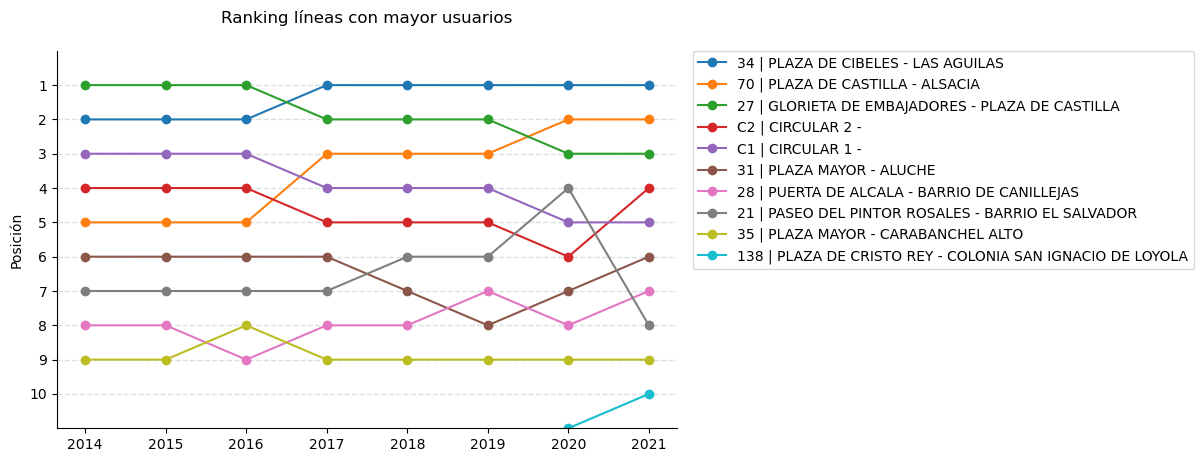

In [23]:
data = ranking.sort_values(by='2021').iloc[0:10,:].reset_index(drop=True)

fig, axes = plt.subplots(figsize=(8, 5),dpi=100)
axes.spines.right.set_visible(False)
axes.spines.top.set_visible(False)

# Visualizo los datos (avg_coches) y fechas

years = ranking.columns[3:]
axes.plot(years,data.iloc[:,3:].T.values,'-o',label=data['Etiqueta'] + ' | ' +data['Denominación'])

# # Título y nombre ejes
# axes.set_xlabel('Años')
axes.set_ylabel('Posición')
axes.set_title(label=f'Ranking líneas con mayor usuarios',pad=20)
   
axes.set_xticks(range(0,len(years)))
axes.set_xticklabels(years)
axes.set_ylim(0,11)
axes.set_yticks(range(1,11))
axes.invert_yaxis()

axes.grid(color="#172a3d", linestyle='--', linewidth=1, axis='y', alpha=0.15)
axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)
fig.set_facecolor('white')
plt.show()

# Aclaraciones

|    |   Año | Informacion                                                                                 |
|---:|------:|:--------------------------------------------------------------------------------------------|
|  0 |  2019 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
|  1 |  2019 | (2)  El 1 de abril de 2019 el Servicio Especial 722 se transforma en la línea 166.          |
|  2 |  2020 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
|  3 |  2020 | (2)  El 18 de febrero se crea la línea 361.                                                 |
|  4 |  2020 | (3)  El 3 de marzo de 2020 la línea 602 se prolonga y se transforma en la línea 362.        |
|  5 |  2020 | (4)  El 16 de marzo de 2020 el Servicio Especial 723 se transforma en la línea 159.         |
|  6 |  2020 | (5)  El Servicio Especial 710 funciona del 23 de marzo al 24 de mayo de 2020.               |
|  7 |  2020 | (6)  El 15 de septiembre se crea la línea 363.                                              |
|  8 |  2020 | (7)  El 7 de octubre se crea el Servicio Especial 712.                                      |
|  9 |  2021 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
| 10 |  2021 | (2)  El 16 de febrero se crea la línea 167.                                                 |
| 11 |  2021 | (3)  El 2 de marzo se crea la línea 163.                                                    |
| 12 |  2021 | (4)  El 17 de marzo se crea la línea 405.                                                   |
| 13 |  2021 | (5)  El 1 de septiembre se crea el Servicio Especial 708.                                   |



Además, hay otras aclaraciones que no se contemplan como el cambio de `Servicio Especial` a  `Regular` de la línea con tramo `MAR DE CRISTAL - VALDEBEBAS`

In [ ]:
pd.concat([numero_viajeros.loc[(numero_viajeros['Código']==171)].sort_values(by='2021',ascending=False),\
            numero_viajeros.loc[(numero_viajeros['Código']==799)].sort_values(by='2021',ascending=False)]
            )

In [ ]:
numero_viajeros.loc[(numero_viajeros['Código']==171)].sort_values(by='2021',ascending=False).combine_first(numero_viajeros.loc[(numero_viajeros['Código']==799)].sort_values(by='2021',ascending=False)).iloc[:,3:].max().to_frame().T

In [ ]:
numero_viajeros['media'] = numero_viajeros.iloc[:,3:].apply(lambda x: x.mean(),axis=1)

In [ ]:
numero_viajeros.sort_values(by='media',ascending=False)

In [ ]:
numero_viajeros[numero_viajeros['Etiqueta']=='SE']

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022
32,34,34,PLAZA DE CIBELES - LAS AGUILAS,7840818,7984636,8363237,8575908,8496485,8986303,5167825,6650128,3432417
68,70,70,PLAZA DE CASTILLA - ALSACIA,7122258,7129357,7252981,7508617,7286532,7677360,4416674,5228237,2714421
25,27,27,GLORIETA DE EMBAJADORES - PLAZA DE CASTILLA,8902761,8767669,8916906,8269113,7750416,8230803,3970651,4795961,2428158
67,69,C2,CIRCULAR 2 -,7278401,7239262,7442740,7003394,6686799,6926192,3581783,4483508,2357121
66,68,C1,CIRCULAR 1 -,7478016,7333224,7483436,7161191,6832968,6989959,3605080,4434154,2359257
...,...,...,...,...,...,...,...,...,...,...,...,...
241,732,SE,PUERTA DE ARGANDA - SAINZ DE BARANDA,0,8268,0,0,331646,0,0,0,0
107,117,117,ALUCHE - COLONIA SAN IGNACIO DE LOYOLA,1008768,1001468,979882,906343,1111297,832268,0,0,0
243,737,SE,LEGAZPI - LAGUNA,0,0,0,0,0,0,0,0,28
244,739,SE,POZUELO - HOSPITAL ENFERMERA ISABEL ZENDAL,0,0,0,0,0,0,0,0,8076


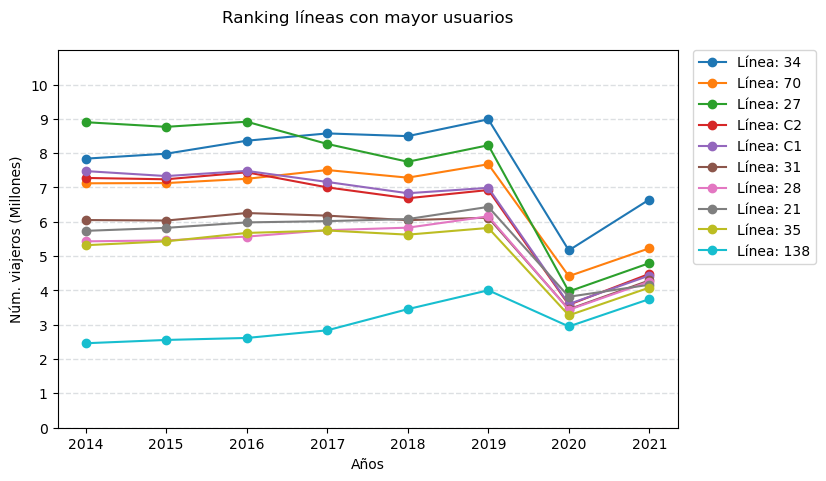

In [93]:
fig, axes = plt.subplots(figsize=(8, 5),dpi=100)

# Ocultar boordes del gráfico
axes.spines.right.set_visible(False)
axes.spines.top.set_visible(False)

# Visualización de los datos
years = numero_viajeros.columns[3:-1].values
axes.plot(years,numero_viajeros.sort_values(by='2021',ascending=False).iloc[0:10,3:-1].apply(lambda x: x/(10**6)).T.values,'-o',label='Línea: '+data['Etiqueta'])

# Rejilla
axes.grid(color="#172a3d", linestyle='--', linewidth=1, axis='y', alpha=0.15)

# Título y nombre de los ejes
axes.set_xlabel('Años')
axes.set_ylabel('Núm. viajeros (Millones)')
axes.set_title(label=f'Ranking líneas con mayor usuarios',pad=20)



# axes.set_xticks(range(0,len(years)))
# axes.set_xticklabels(years)

# Pasamos a decimal los datos (/10^6) para poder mostrarlos en formato decimal de millones 
y_max = round(max(numero_viajeros.sort_values(by='2021',ascending=False).iloc[:,3:-1].max().apply(lambda x: x/(10**6)).to_list()))
axes.set_ylim(0,y_max+2)
axes.set_yticks(range(0,y_max+2))

# Leyenda y fondo en blanco del gráfico
axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)
fig.set_facecolor('white')
plt.show()
plt.close()